In [1]:
#Ashadur Omith
#Project Milestone 1

In [2]:
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns 

import statsmodels.formula.api as smf
import numpy as np
%matplotlib inline

In [3]:
dmv = pd.read_csv("rows.csv")
dmv

/Users/ashaduromith/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,10/30/2020,10:00,BROOKLYN,11215,40.668293,-73.979240,"(40.668293, -73.97924)",NaN,NaN,506 6 STREET,...,NaN,NaN,NaN,NaN,4362870,Ambulance,NaN,NaN,NaN,NaN
1,09/29/2020,5:30,NaN,NaN,40.673107,-73.999590,"(40.673107, -73.99959)",BROOKLYN QUEENS EXPRESSWAY,NaN,NaN,...,Driver Inattention/Distraction,Unspecified,NaN,NaN,4355070,Station Wagon/Sport Utility Vehicle,Sedan,Sedan,NaN,NaN
2,09/16/2020,11:00,NaN,NaN,NaN,NaN,NaN,ROCKAWAY BOULEVARD,BROOKVILLE BOULEVARD,NaN,...,Unspecified,NaN,NaN,NaN,4348585,Sedan,Sedan,NaN,NaN,NaN
3,10/09/2020,17:10,BRONX,10468,40.862747,-73.904940,"(40.862747, -73.90494)",WEST FORDHAM ROAD,UNIVERSITY AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4356755,Sedan,Sedan,NaN,NaN,NaN
4,05/03/2018,16:53,BROOKLYN,11223,40.595753,-73.964676,"(40.595753, -73.964676)",NaN,NaN,620 AVENUE V,...,NaN,NaN,NaN,NaN,3894635,Sedan,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1760592,07/20/2012,22:15,NaN,NaN,40.869591,-73.820392,"(40.8695913, -73.8203916)",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2912166,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
1760593,07/23/2012,21:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FRONT OF 212-02 UION TURNPIKE,...,Backing Unsafely,NaN,NaN,NaN,259542,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN
1760594,07/22/2012,18:05,QUEENS,11372,40.752374,-73.879103,"(40.7523742, -73.8791033)",88 STREET,35 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,279816,PASSENGER VEHICLE,UNKNOWN,NaN,NaN,NaN
1760595,07/21/2012,16:20,MANHATTAN,10005,40.704824,-74.006900,"(40.7048242, -74.0068996)",FRONT STREET,WALL STREET,NaN,...,NaN,NaN,NaN,NaN,214,PASSENGER VEHICLE,NaN,NaN,NaN,NaN


In [4]:
dmv.dtypes

CRASH DATE                        object
CRASH TIME                        object
BOROUGH                           object
ZIP CODE                          object
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
COLLISION_ID                       int64
VEHICLE TYPE COD

In [5]:
dmv.columns = [c.replace(' ', '_') for c in dmv.columns]

In [6]:
dmv["CRASH_DATE"] = pd.to_datetime(dmv["CRASH_DATE"])
dmv["CRASH_TIME"] = pd.to_datetime(dmv["CRASH_TIME"])

In [7]:
dmv_cleaned = dmv.dropna()

In [8]:
dmv_cleaned["year"] = dmv_cleaned["CRASH_DATE"].dt.year
dmv_cleaned["month"] = dmv_cleaned["CRASH_DATE"].dt.month_name()

In [9]:
dmv_cleaned["hour"]= pd.to_datetime(dmv_cleaned["CRASH_TIME"]).dt.hour

IndexError: index 0 is out of bounds for axis 0 with size 0

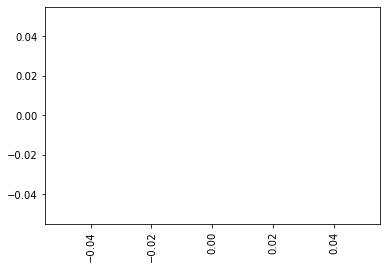

In [10]:
dmv_cleaned.groupby("month").count().plot(kind="bar", legend = False, color = "black")
plt.title("Collisions by Month")
plt.xlabel("Month")
plt.ylabel("Collision Reports")

In [ ]:
dmv_cleaned.groupby("hour").count().plot(kind="bar", legend = False, color = "blue")
plt.title("Collisions by Time")
plt.xlabel("Time")
plt.ylabel("Collision Reports")


In [ ]:
#Looking at the distribution of incidents per hour, it is evident that the most accidents occur at 5PM, the time when everybody in the city is rushing home

In [ ]:
dmv_cleaned.groupby("BOROUGH").count().plot(kind="bar", color = "green", legend = False)
plt.title("Collisions by Borough")
plt.xlabel("Borough")
plt.ylabel("Collision Reports")

In [ ]:
#In this graph, we can see all the total incidents per Borough.

In [ ]:
dmv_cleaned["NUMBER_OF_PERSONS_KILLED"].sum()

In [ ]:
dmv_cleaned["NUMBER_OF_PERSONS_INJURED"].sum()

In [ ]:
yearDeath = dmv_cleaned.groupby(dmv_cleaned["year"]).sum()["NUMBER_OF_PERSONS_KILLED"]
yearDeath.plot(kind = "bar")

plt.title("Car Collision Death Reports")
plt.xlabel("Year")
plt.ylabel("Number of People")

In [ ]:
dmv_grouped_year = dmv_cleaned.groupby(dmv_cleaned["year"]).sum()

In [ ]:
dmv_grouped_year[["NUMBER_OF_PERSONS_KILLED","NUMBER_OF_PERSONS_INJURED"]].plot(kind = "bar")
plt.title("People Injured vs. Killed in Collision")
plt.xlabel("Year")
plt.ylabel("Collision Reports")

In [ ]:
# By looking at this chart, i can tell that in the accidents reported people were mostly injured instead of rather killed

In [ ]:
#MILESTONE 02 *********************************

In [ ]:
df = dmv_cleaned
df

In [ ]:
#MILESTONE 3 ---------------------------------------------------------

In [ ]:
import folium

In [ ]:
bins_map = folium.Map(location = [40.7128, -74.0060])
bins_map

In [ ]:
df2 = df[["LATITUDE", "LONGITUDE", "hour", "month", "year"]]
df2

In [ ]:
month_filter = df2["month"]=="July"

In [ ]:
hour_filter = df2["hour"]==17

In [ ]:
year_filter = df2["year"]==2020

In [ ]:
rush_hour = df2[hour_filter]
rush_hour2 = rush_hour[month_filter]
rush_hour3 = rush_hour[year_filter]
rush_hour3

In [ ]:
rush_hour3 = rush_hour3.reset_index(drop = True)
rush_hour3

In [ ]:
for i in range(30):
    row = rush_hour3.loc[i]
    folium.Marker([row["LATITUDE"], row["LONGITUDE"]]).add_to(bins_map)
    
bins_map